## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
print(mouse_metadata.shape)
mouse_metadata.columns

(249, 5)


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [3]:
print(study_results.shape)
study_results.columns

(1893, 4)


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [4]:
# Combine the data into a single dataset
df = study_results.merge(mouse_metadata, on="Mouse ID", how="inner")
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [7]:
# Checking the number of mice.
df["Mouse ID"].value_counts()

g989    13
r811    10
w422    10
a492    10
y769    10
        ..
x226     1
b447     1
o848     1
n482     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [8]:
len(mouse_metadata)

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
sum(df.duplicated(subset=["Mouse ID", "Timepoint"]))

5

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df.duplicated(subset=["Mouse ID", "Timepoint"])
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask_clean = df["Mouse ID"] != "g989"
df_clean = df.loc[mask_clean].reset_index(drop=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [12]:
# Checking the number of mice in the clean DataFrame.
df_clean["Mouse ID"].value_counts()

l733    10
c139    10
i557    10
o562    10
u327    10
        ..
x226     1
b447     1
o848     1
n482     1
h428     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [13]:
df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [14]:
df_clean.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugGroups = df_clean.groupby("Drug Regimen")

avgTumor = drugGroups["Tumor Volume (mm3)"].mean()
medTumor = drugGroups["Tumor Volume (mm3)"].median()
varTumor = drugGroups["Tumor Volume (mm3)"].var()
stdTumor = drugGroups["Tumor Volume (mm3)"].std()
semTumor = drugGroups["Tumor Volume (mm3)"].sem()

summ_table = pd.DataFrame()
summ_table["Mean Tumor Volume"] = avgTumor
summ_table["Median Tumor Volume"] = medTumor
summ_table["Variance Tumor Volume"] = varTumor
summ_table["Standard Deviation Tumor Volume"] = stdTumor
summ_table["SEM Tumor Volume"] = semTumor

summ_table

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
df_clean.groupby("Drug Regimen").size()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64

In [17]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drugGroups["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [18]:
df_clean["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

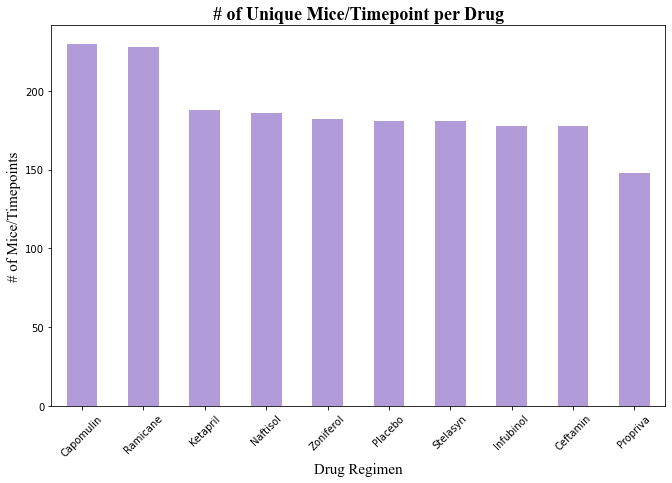

In [19]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
plt.figure(figsize=(11,7))

df_clean["Drug Regimen"].value_counts().plot(kind = "bar", color ="#b19cd9")

plt.title("# of Unique Mice/Timepoint per Drug", fontweight="bold", fontsize=18, fontname='Times New Roman')
plt.xlabel("Drug Regimen", fontsize=15, fontname='Times New Roman')
plt.ylabel("# of Mice/Timepoints", fontsize=15, fontname='Times New Roman')

plt.xticks(rotation=45)

plt.show()

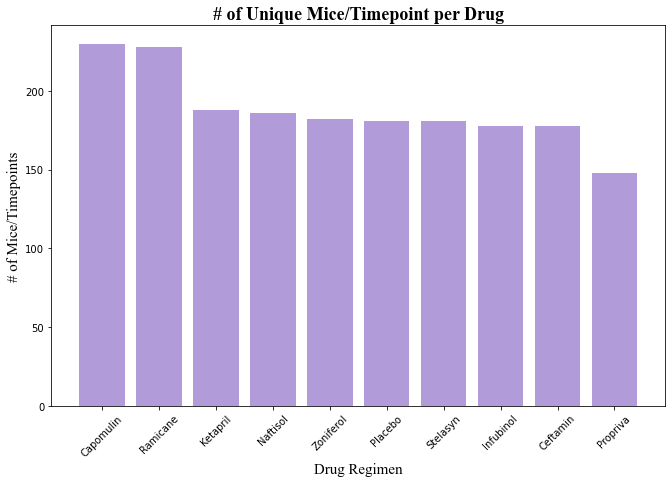

In [20]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
data = df_clean["Drug Regimen"].value_counts()

x = data.index
y = data.values

plt.figure(figsize=(11,7))
plt.bar(x,y, color="#b19cd9")

plt.title("# of Unique Mice/Timepoint per Drug", fontweight="bold", fontsize=18, fontname='Times New Roman')
plt.xlabel("Drug Regimen", fontsize=15, fontname='Times New Roman')
plt.ylabel("# of Mice/Timepoints", fontsize=15, fontname='Times New Roman')

plt.xticks(rotation=45)

plt.show()

In [21]:
df_clean.groupby("Sex")["Mouse ID"].count()

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

In [22]:
df_clean.groupby(["Sex", "Mouse ID"]).size().reset_index().Sex.value_counts()

Male      125
Female    123
Name: Sex, dtype: int64

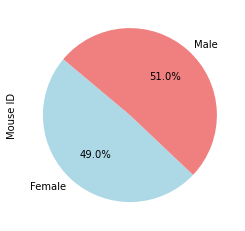

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["lightblue","lightcoral"]
df_clean.groupby("Sex")["Mouse ID"].count().plot(kind="pie", colors =colors, startangle=140, autopct="%1.1f%%")
plt.show()

In [24]:
genderData = df_clean.groupby("Sex")["Mouse ID"].count()
genderData

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

In [25]:
list(genderData.index)

['Female', 'Male']

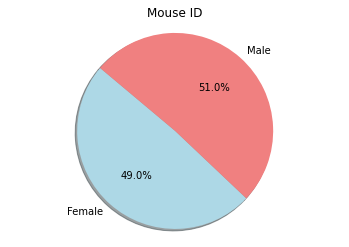

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(genderData.index)
genderNum = list(genderData.values)
colors = ["lightblue","lightcoral"]

plt.pie(genderNum, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Mouse ID")
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [28]:
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
df_final = df_clean.loc[df_clean["Drug Regimen"].isin(regimens)].reset_index(drop=True)
len(df_final)

814

In [29]:
df_final.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [30]:
df_final.groupby("Mouse ID").max()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a275,45,62.999356,3,Ceftamin,Female,20,28
a411,45,45.466677,1,Ramicane,Male,3,22
a444,45,45.000000,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...
y769,45,68.594745,4,Ceftamin,Female,6,27
y793,45,45.000000,2,Capomulin,Male,17,17
y865,45,64.729837,3,Ceftamin,Male,23,26


In [31]:
maxMouse = df_final.groupby("Mouse ID").Timepoint.max().reset_index()
maxMouse

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


In [32]:
df_regimen =  pd.DataFrame()

for indx, row in maxMouse.iterrows():
    mask = ((df_final["Mouse ID"] == row["Mouse ID"]) & (df_final["Timepoint"] == row["Timepoint"]))
    found = df_final.loc[mask]
    df_regimen = df_regimen.append(found)
    
df_regimen = df_regimen.reset_index(drop=True)
df_regimen

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [33]:
df_regimen2 = df_final.merge(maxMouse, on=["Mouse ID", "Timepoint"])
df_regimen2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25


In [34]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [35]:
drug_data = []

for drugs in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]:
    found = df_regimen.loc[df_regimen["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]
    
    # quartile calculations if in data
    quartiles = found.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(drugs)
    print()
    print(f"The lower quartile temperatures is: {lowerq}")
    print(f"The upper quartile temperatures is: {upperq}")
    print(f"The interquartile range temperatures is: {iqr}")
    print(f"The the median temperatures is: {quartiles[0.5]}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} and above {upper_bound} could be outliers.")
    
    print()
    print()

    drug_data.append(found.values)

Capomulin

The lower quartile temperatures is: 32.37735684
The upper quartile temperatures is: 40.1592203
The interquartile range temperatures is: 7.781863460000004
The the median temperatures is: 38.125164399999996
Values below 20.70456164999999 and above 51.83201549 could be outliers.


Ramicane

The lower quartile temperatures is: 31.56046955
The upper quartile temperatures is: 40.65900627
The interquartile range temperatures is: 9.098536719999998
The the median temperatures is: 36.56165229
Values below 17.912664470000003 and above 54.30681135 could be outliers.


Infubinol

The lower quartile temperatures is: 54.04860769
The upper quartile temperatures is: 65.52574285
The interquartile range temperatures is: 11.477135160000003
The the median temperatures is: 60.16518046
Values below 36.83290494999999 and above 82.74144559000001 could be outliers.


Ceftamin

The lower quartile temperatures is: 48.72207785
The upper quartile temperatures is: 64.29983003
The interquartile range tempe

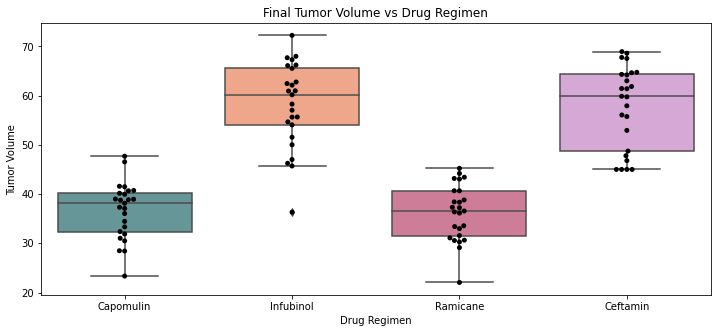

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
my_pal = ["cadetblue", "lightsalmon", "palevioletred", "plum"]
pal2 = ["#000000"]
plt.figure(figsize=(12,5))

sns.boxplot(x="Drug Regimen", y="Tumor Volume (mm3)", palette = my_pal, data=df_regimen2)
sns.swarmplot(x="Drug Regimen", y="Tumor Volume (mm3)", palette = pal2, data=df_regimen2)

plt.title('Final Tumor Volume vs Drug Regimen')
plt.ylabel('Tumor Volume')

plt.show()

## Line and Scatter Plots

In [37]:
mouse = df_clean.loc[df_clean['Mouse ID'] == "y793"].reset_index(drop=True)
mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,y793,0,45.000000,0,Capomulin,Male,17,17
1,y793,5,41.019913,0,Capomulin,Male,17,17
2,y793,10,41.630010,1,Capomulin,Male,17,17
3,y793,15,42.283665,1,Capomulin,Male,17,17
4,y793,20,40.716428,2,Capomulin,Male,17,17
5,y793,25,38.992734,2,Capomulin,Male,17,17
6,y793,30,35.726023,2,Capomulin,Male,17,17
7,y793,35,36.327870,2,Capomulin,Male,17,17
8,y793,40,31.475411,2,Capomulin,Male,17,17
9,y793,45,31.896238,2,Capomulin,Male,17,17


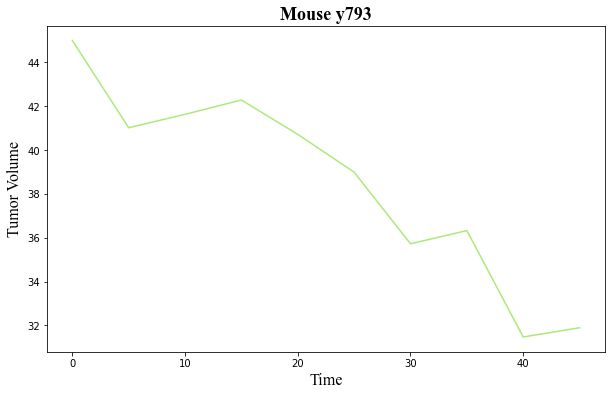

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.figure(figsize=(10,6))

x = mouse.Timepoint
y = mouse["Tumor Volume (mm3)"]

plt.plot(x, y, color="#ACE97A")

plt.title("Mouse y793", fontsize=18, fontweight="bold", fontname="Times New Roman")
plt.xlabel('Time', fontsize=16, fontname="Times New Roman")
plt.ylabel("Tumor Volume", fontsize=16, fontname="Times New Roman")

plt.show() 

In [39]:
weightTumor_df = df_clean.loc[df_clean["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()
weightTumor_df.head()

<ipython-input-39-3c9d5255f96f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weightTumor_df = df_clean.loc[df_clean["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


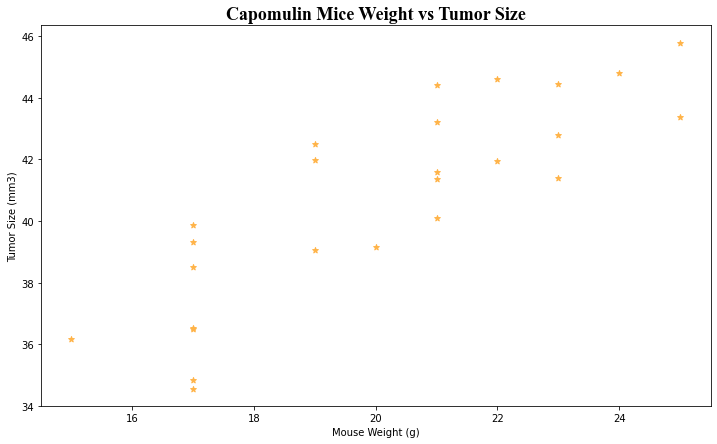

In [40]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.figure(figsize=(12,7))

plt.scatter(weightTumor_df["Weight (g)"], weightTumor_df["Tumor Volume (mm3)"], color = "#ffb347", marker= "*")
plt.title("Capomulin Mice Weight vs Tumor Size", fontsize=18, fontweight="bold", fontname = "Times New Roman")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Size (mm3)")

plt.show()

## Correlation and Regression

In [41]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as sts

In [42]:
weightTumor_df.corr()

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


In [43]:
sts.pearsonr(weightTumor_df["Weight (g)"], weightTumor_df["Tumor Volume (mm3)"])

(0.8419363424694717, 1.322572243471279e-07)

In [44]:
feature = weightTumor_df["Weight (g)"]
target = weightTumor_df["Tumor Volume (mm3)"]

y = 0.95x + 21.55
The r-squared is: 0.7088568047708717


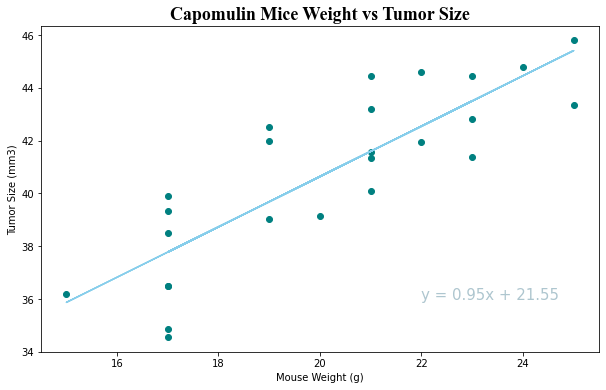

In [45]:
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(feature, target)
regress_values = feature * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-squared is: {rvalue**2}")

plt.figure(figsize=(10,6))

plt.scatter(feature, target, color = "#008080")
plt.title("Capomulin Mice Weight vs Tumor Size", fontsize=18, fontweight="bold", fontname = "Times New Roman")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Size (mm3)")
plt.plot(feature, regress_values, color="#87ceeb")
plt.annotate(line_eq,(22,36),fontsize=15,color="#aec6cf")

plt.show()

In [46]:
X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Tumor Volume (mm3)   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     56.00
Date:                Sun, 01 Nov 2020   Prob (F-statistic):           1.32e-07
Time:                        15:56:47   Log-Likelihood:                -48.966
No. Observations:                  25   AIC:                             101.9
Df Residuals:                      23   BIC:                             104.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5522      2.591      8.318      0.000      16.192      26.912
Weight (g)     0.9544      0.128      7.483      0.000       0.691       1.218
==============================================================================
Omnibus:                        1.497   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                0.951
Skew:                          -0.025   Prob(JB):                        0.622
Kurtosis:                       2.046   Cond. No.                         147.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
slope = results.params[1]
intercept = results.params[0]

regress_values = feature * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.95x + 21.55'

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
reg = LinearRegression()
reg.fit(np.array(feature.values).reshape(-1, 1), np.array(target))
reg.coef_

array([0.95443969])

In [49]:
reg.intercept_

21.55216053268502

In [50]:
reg.predict([[21.5]])

array([42.07261385])